Some (basic) exploratory data analysis on the targets.

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import numpy as np
import cv2
from PIL import Image
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import json

In [ ]:
%run utils.ipynb

/content/drive/MyDrive/Colab Notebooks


### Exploratory Data Analysis

In [ ]:
motion_data_path = 'data/motion/ws_0.5.npz'
motion_data = np.load(motion_data_path)
tip_pos = motion_data['position_rod1'][:, [2, 0, 1], -1]  # all positions of last node ([2,0,1] converts to xyz)

In [ ]:
%matplotlib inline
def stats(tip_pos):
  """
  Computes statistics and visualizes histograms of the given tip_pos data.

  Parameters:
      tip_pos (numpy.ndarray):
        Array of tip positions with shape (N, 3), where N is the number of samples.
        Each row represents the tip position in 3D space with X, Y, and Z coordinates.

  Returns:
      None

  Prints:
      - Histograms of the X, Y, and Z coordinates of tip_pos.
      - Mean and standard deviation of each axis (X, Y, and Z) of tip_pos.
      - Minimum and maximum absolute values of non-zero elements in each axis (X, Y, and Z) of tip_pos.

  Example:
      tip_pos = np.random.rand(100, 3)  # Generate random tip positions
      stats(tip_pos)  # Compute statistics and visualize histograms  fig, ax = plt.subplots(3, 1)
  """
  ax[0].hist(tip_pos[:, 0])
  ax[1].hist(tip_pos[:, 1])
  ax[2].hist(tip_pos[:, 2])
  print(
      f"Mean of axis X: {np.mean(tip_pos[:, 0])}",
      f"Std of axis X: {np.std(tip_pos[:, 0])}",
      sep='\n'
  )

  print(
      f"Mean of axis Y: {np.mean(tip_pos[:, 1])}",
      f"Std of axis Y: {np.std(tip_pos[:, 1])}",
      sep='\n'
  )

  print(
      f"Mean of axis Z: {np.mean(tip_pos[:, 2])}",
      f"Std of axis Z: {np.std(tip_pos[:, 2])}",
      sep='\n'
  )
  X, Y, Z = tip_pos[:, 0], tip_pos[:, 1], tip_pos[:, 2]
  print(np.min(np.abs(X[X != 0])), np.max(np.abs(X[X != 0])))
  print(np.min(np.abs(Y[Y != 0])), np.max(np.abs(Y[Y != 0])))
  print(np.min(np.abs(Z[Z != 0])), np.max(np.abs(Z[Z != 0])))

Mean of axis X: -0.0011772208074385662
Std of axis X: 0.0725042839413252
Mean of axis Y: -0.0008676560456958852
Std of axis Y: 0.07543086224870497
Mean of axis Z: -0.18952560672860655
Std of axis Z: 0.03436694821765101
4.186138268660784e-05 0.14835816245742894
0.0001786410986302088 0.163174668090538
0.09161137952685168 0.2732533291409953


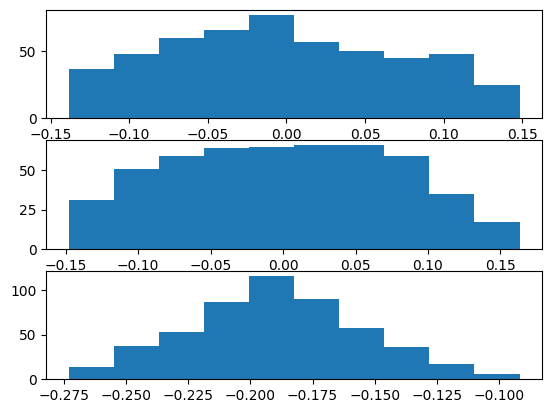

In [ ]:
%matplotlib inline
stats(tip_pos)

Mean of axis X: -0.11772208074385661
Std of axis X: 7.250428394132521
Mean of axis Y: -0.08676560456958878
Std of axis Y: 7.543086224870498
Mean of axis Z: -18.952560672860656
Std of axis Z: 3.436694821765101
0.0041861382686607836 14.835816245742894
0.01786410986302088 16.317466809053798
9.161137952685168 27.325332914099533


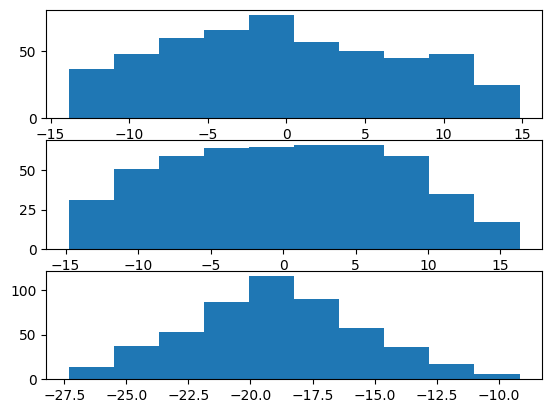

In [ ]:
%matplotlib inline
tip_pos *= 100
stats(tip_pos)
tip_pos /= 100

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

tip_pos = scaler.fit_transform(tip_pos)

Mean of axis X: -4.3283548718329687e-19
Std of axis X: 1.0
Mean of axis Y: 0.0
Std of axis Y: 1.0
Mean of axis Z: 9.69551491290585e-17
Std of axis Z: 1.0
0.0018245740139993774 2.0624351436375883
0.0014650738310480122 2.1747374913383046
0.005092790766152854 2.8490812329814523


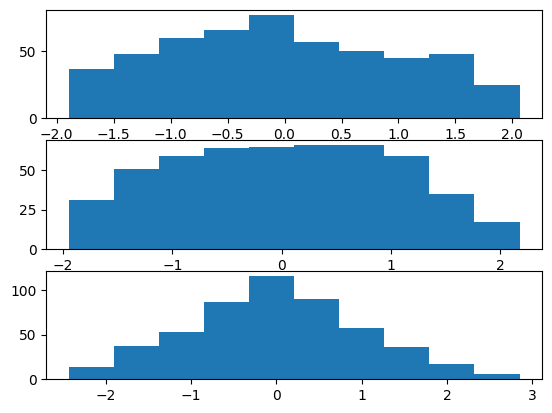

In [ ]:
%matplotlib inline
stats(tip_pos)

As we can see:
* original measures in `meters` have the problem of having too small values, down to $O(10^{-5})$, which can affect negatively training;
* original measures rescaled in `centimeters` do not have too small values, but their highest ones reach $O(10^1)$, which may still slow down training somehow. However, empirical preliminary trials showed better results than measures in `meters`;
* original measures rescaled according to `StandardScaler` (i.e., subtracting mean and dividing by standard deviations) limit both the above problems, but still there are three orders of magnitude between the smallest ($\approx 10^{-3}$) and the biggest ($\approx 2$) values. However, it is not clear if the given measures for loss and other metrics shall be interpreted as in `meters` or in `centimeters`, since rescaling gives the same values for both measure units.